In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *

In [99]:
data=pd.read_csv("Dateset_2_6_19.csv")

In [100]:
data.describe()

,date,day_path,away_lp_day,away_lp,home_lp_day,home_lp,home_win
count,4.129800e+04,41298.000000,41298.000000,41298.000000,41298.000000,41298.000000,41298.000000
mean,2.008068e+07,7.152453,5.778827,8.094629,5.760497,8.122912,0.540002
std,4.898686e+04,4.843864,3.051637,7.660322,3.055793,7.699747,0.498403
min,2.000033e+07,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.004052e+07,4.000000,3.000000,4.000000,3.000000,4.000000,0.000000
50%,2.008063e+07,7.000000,6.000000,7.000000,6.000000,7.000000,1.000000
75%,2.012082e+07,9.000000,8.000000,9.000000,8.000000,9.000000,1.000000
max,2.016100e+07,22.000000,11.000000,33.000000,11.000000,33.000000,1.000000


In [101]:
data.head()

,date,day_path,day_zodiac_sign,away_name,home_name,away_starting_pitcher_name,away_dob,away_lp_day,away_lp,away_zodiac,home_starting_pitcher_name,home_dob,home_lp_day,home_lp,home_zodiac,home_win
0,20000329,7,Dragon,CHN,NYN,Jon Lieber,4/2/1970,11,5,Dog,Mike Hampton,9/9/1972,9,1,Rat,0
1,20000330,8,Dragon,NYN,CHN,Rick Reed,8/16/1964,7,8,Dragon,Kyle Farnsworth,4/14/1976,5,5,Dragon,0
2,20000403,9,Dragon,COL,ATL,Pedro Astacio,11/28/1968,1,9,Monkey,Greg Maddux,4/14/1966,5,4,Horse,1
3,20000403,9,Dragon,MIL,CIN,Steve Woodard,5/15/1975,6,33,Hare,Pete Harnisch,9/23/1966,5,9,Horse,1
4,20000403,9,Dragon,SFN,FLO,Livan Hernandez,2/20/1975,11,8,Hare,Alex Fernandez,8/13/1969,4,1,Rooster,1


In [102]:
data.isnull().sum

<bound method DataFrame.sum of         date  day_path  day_zodiac_sign  away_name  home_name  \
0      False     False            False      False      False   
1      False     False            False      False      False   
2      False     False            False      False      False   
3      False     False            False      False      False   
4      False     False            False      False      False   
5      False     False            False      False      False   
6      False     False            False      False      False   
7      False     False            False      False      False   
8      False     False            False      False      False   
9      False     False            False      False      False   
10     False     False            False      False      False   
11     False     False            False      False      False   
12     False     False            False      False      False   
13     False     False            False      False      Fal

In [7]:
len(data.away_starting_pitcher_name.unique())

1316

In [8]:
len(data.home_starting_pitcher_name.unique())

1300

In [9]:
data.home_name.unique()

array(['NYN', 'CHN', 'ATL', 'CIN', 'FLO', 'MON', 'SLN', 'ANA', 'BAL',
       'MIN', 'OAK', 'TEX', 'TOR', 'ARI', 'PIT', 'SEA', 'HOU', 'KCA',
       'TBA', 'COL', 'MIL', 'PHI', 'SDN', 'SFN', 'BOS', 'DET', 'NYA',
       'LAN', 'CHA', 'CLE', 'WAS', 'MIA'], dtype=object)

In [10]:
data.day_zodiac_sign.unique()

array(['Dragon', 'Snake', 'Horse', 'sheep', 'Monkey', 'Rooster', 'Dog',
       'Pig', 'Rat', 'Ox', 'Tiger', 'Hare'], dtype=object)

In [11]:
column_name=[]
for col in data.columns:
    column_name.append(col) 

In [12]:
column_name

['date',
 'day_path',
 'day_zodiac_sign',
 'away_name',
 'home_name',
 'away_starting_pitcher_name',
 'away_dob',
 'away_lp_day',
 'away_lp',
 'away_zodiac',
 'home_starting_pitcher_name',
 'home_dob',
 'home_lp_day',
 'home_lp',
 'home_zodiac',
 'home_win']

In [103]:
X=data.loc[:,['day_path','day_zodiac_sign','away_name','home_name','away_lp_day','away_lp','away_zodiac','home_lp_day','home_lp','home_zodiac']]

In [7]:
y=data.iloc[:,-1]

In [8]:
X.head()

,day_path,day_zodiac_sign,away_name,home_name,away_lp_day,away_lp,away_zodiac,home_lp_day,home_lp,home_zodiac
0,7,Dragon,CHN,NYN,11,5,Dog,9,1,Rat
1,8,Dragon,NYN,CHN,7,8,Dragon,5,5,Dragon
2,9,Dragon,COL,ATL,1,9,Monkey,5,4,Horse
3,9,Dragon,MIL,CIN,6,33,Hare,5,9,Horse
4,9,Dragon,SFN,FLO,11,8,Hare,4,1,Rooster


In [9]:
X.describe()

,day_path,away_lp_day,away_lp,home_lp_day,home_lp
count,41298.000000,41298.000000,41298.000000,41298.000000,41298.000000
mean,7.152453,5.778827,8.094629,5.760497,8.122912
std,4.843864,3.051637,7.660322,3.055793,7.699747
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,4.000000,3.000000,4.000000
50%,7.000000,6.000000,7.000000,6.000000,7.000000
75%,9.000000,8.000000,9.000000,8.000000,9.000000
max,22.000000,11.000000,33.000000,11.000000,33.000000


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lb=LabelEncoder()

In [13]:
X['day_zodiac_sign']=lb.fit_transform(X['day_zodiac_sign'])

In [14]:
X['away_name']=lb.fit_transform(X['away_name'])
X['home_name']=lb.fit_transform(X['home_name'])
X['away_zodiac']=lb.fit_transform(X['away_zodiac'])
X['home_zodiac']=lb.fit_transform(X['home_zodiac'])

In [15]:
X.describe()

,day_path,day_zodiac_sign,away_name,home_name,away_lp_day,away_lp,away_zodiac,home_lp_day,home_lp,home_zodiac
count,41298.000000,41298.000000,41298.000000,41298.000000,41298.000000,41298.000000,41298.000000,41298.000000,41298.000000,41298.000000
mean,7.152453,5.530001,15.343043,15.345247,5.778827,8.094629,5.556322,5.760497,8.122912,5.567340
std,4.843864,3.550068,9.390701,9.392839,3.051637,7.660322,3.445470,3.055793,7.699747,3.448202
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,4.000000,3.000000,7.000000,7.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000
50%,7.000000,5.000000,15.000000,16.000000,6.000000,7.000000,6.000000,6.000000,7.000000,6.000000
75%,9.000000,9.000000,24.000000,24.000000,8.000000,9.000000,9.000000,8.000000,9.000000,9.000000
max,22.000000,11.000000,31.000000,31.000000,11.000000,33.000000,11.000000,11.000000,33.000000,11.000000


In [16]:
corr=data.corr()

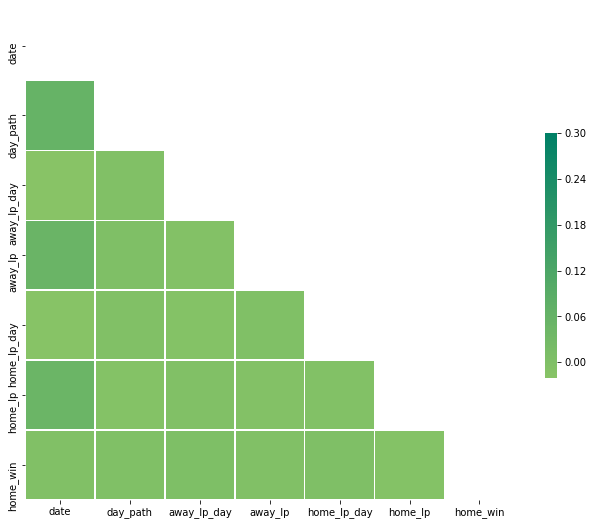

In [17]:
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,mask=mask,cmap='summer_r',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [18]:
corr

,date,day_path,away_lp_day,away_lp,home_lp_day,home_lp,home_win
date,1.000000,0.060787,-0.019940,0.051028,-0.016576,0.047709,-0.002557
day_path,0.060787,1.000000,-0.001636,0.000835,-0.003498,-0.009632,-0.000139
away_lp_day,-0.019940,-0.001636,1.000000,-0.006197,-0.010272,-0.001877,0.002665
away_lp,0.051028,0.000835,-0.006197,1.000000,-0.001058,-0.006336,-0.003072
home_lp_day,-0.016576,-0.003498,-0.010272,-0.001058,1.000000,-0.005660,0.002372
home_lp,0.047709,-0.009632,-0.001877,-0.006336,-0.005660,1.000000,-0.009459
home_win,-0.002557,-0.000139,0.002665,-0.003072,0.002372,-0.009459,1.000000


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=1, random_state=None,max_features='auto')
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
Y_pred=clf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [26]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_pred,Y_test)
print(score)

0.5418886198547216


In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100, 500],
    'max_depth':[1,30]}
    #max_features': ['auto', 'sqrt', 'log2']
#}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 500], 'max_depth': [1, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
sorted(CV_rfc.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [29]:
print(CV_rfc.best_params_)

{'max_depth': 1, 'n_estimators': 100}


In [30]:
from sklearn  import tree
model=tree.DecisionTreeClassifier(max_depth=10)
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
Y_pred=model.predict(X_test)
score=accuracy_score(Y_pred,Y_test)
print(score)

0.5273607748184019


In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'max_depth':[1,200]}

CV_tree = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_tree.fit(X_train, Y_train)
print(CV_tree.best_params_)

{'max_depth': 1}


In [33]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=30)
model.fit(X_train,Y_train)
Y_pre=model.predict(X_test)
acc=accuracy_score(Y_test,Y_pre)
print(acc)

0.5052461662631155


In [34]:
param_grid = { 
    'n_neighbors':[1,30]}

CV_knn = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_knn.fit(X_train, Y_train)
print(CV_tree.best_params_)

{'max_depth': 1}


In [21]:
from sklearn import svm
model=svm.SVC(kernel='linear', C=1,gamma=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)


NameError: name 'accuracy_score' is not defined

In [23]:
accuracy =accuracy_score(Y_test,Y_pred)
print(accuracy)

0.5418886198547216


In [38]:
from sklearn import svm
model=svm.SVC(kernel='rbf', C=10,gamma=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
accuracy =accuracy_score(Y_test,Y_pred)
print(accuracy)

0.5415657788539144


In [37]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(C=1 , solver='newton-cg')
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
accuracy =accuracy_score(Y_test,Y_pred)
print(accuracy)

0.5418886198547216


In [39]:
X.shape

(41298, 10)

In [47]:
from keras.models import Sequential
from keras.layers import Dense
classifier=Sequential()
classifier.add(Dense(output_dim = 128, init = 'normal', activation = 'relu', input_dim = 10))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 256, init = 'normal', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 64, init = 'normal', activation = 'relu'))
#classifier.add(Dropout(p=0.1))

# Adding the fourth output layer
classifier.add(Dense(output_dim = 1, init = 'normal', activation = 'linear'))
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()
history=classifier.fit(X_train, Y_train, batch_size = 10, nb_epoch = 100)

/home/rosa-mystica/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=128, kernel_initializer="normal")`
  after removing the cwd from sys.path.
/home/rosa-mystica/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256, kernel_initializer="normal")`
  
/home/rosa-mystica/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="normal")`
  if __name__ == '__main__':
/home/rosa-mystica/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initializer="normal")`
  del sys.path[0]
/home/rosa-mystica/anaco

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_30 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_31 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 65        
Total params: 50,945
Trainable params: 50,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
28908/28908 [==============================] - 4s 143us/step - loss: 0.7098 - acc: 0.5091
Epoch 2/100
28908/28908 [==============================] - 4s 132us/step - loss: 0.6942 - acc: 0.5212
Epoch 3/100
28908/28908 [===================

28908/28908 [==============================] - 4s 130us/step - loss: 0.6881 - acc: 0.5434
Epoch 73/100
28908/28908 [==============================] - 4s 130us/step - loss: 0.6882 - acc: 0.5475
Epoch 74/100
28908/28908 [==============================] - 4s 129us/step - loss: 0.6899 - acc: 0.5465
Epoch 75/100
28908/28908 [==============================] - 4s 132us/step - loss: 0.6896 - acc: 0.5452
Epoch 76/100
28908/28908 [==============================] - 4s 131us/step - loss: 0.6974 - acc: 0.5428
Epoch 77/100
28908/28908 [==============================] - 4s 136us/step - loss: 0.6915 - acc: 0.5446
Epoch 78/100
28908/28908 [==============================] - 4s 132us/step - loss: 0.6899 - acc: 0.5436
Epoch 79/100
28908/28908 [==============================] - 4s 132us/step - loss: 0.6956 - acc: 0.5458
Epoch 80/100
28908/28908 [==============================] - 4s 136us/step - loss: 0.6904 - acc: 0.5429
Epoch 81/100
28908/28908 [==============================] - 4s 140us/step - loss: 0.68

In [59]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1, random_state=0)

In [60]:
Y_pred=clf.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.5418886198547216


In [62]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.5418886198547216


In [68]:
X

,day_path,day_zodiac_sign,away_name,home_name,away_lp_day,away_lp,away_zodiac,home_lp_day,home_lp,home_zodiac
0,7,1,6,20,11,5,0,9,1,7
1,8,1,20,6,7,8,1,5,5,1
2,9,1,9,2,1,9,4,5,4,3
3,9,1,16,7,6,33,2,5,9,3
4,9,1,26,11,11,8,2,4,1,8
5,9,1,14,18,5,11,9,3,7,7
6,9,1,24,20,11,33,6,5,9,9
7,9,1,6,27,9,4,1,11,11,4
8,9,1,19,0,11,1,8,5,11,9
9,9,1,8,3,6,4,5,8,8,4


In [67]:
corr

,date,day_path,away_lp_day,away_lp,home_lp_day,home_lp,home_win
date,1.000000,0.060787,-0.019940,0.051028,-0.016576,0.047709,-0.002557
day_path,0.060787,1.000000,-0.001636,0.000835,-0.003498,-0.009632,-0.000139
away_lp_day,-0.019940,-0.001636,1.000000,-0.006197,-0.010272,-0.001877,0.002665
away_lp,0.051028,0.000835,-0.006197,1.000000,-0.001058,-0.006336,-0.003072
home_lp_day,-0.016576,-0.003498,-0.010272,-0.001058,1.000000,-0.005660,0.002372
home_lp,0.047709,-0.009632,-0.001877,-0.006336,-0.005660,1.000000,-0.009459
home_win,-0.002557,-0.000139,0.002665,-0.003072,0.002372,-0.009459,1.000000


In [69]:
new_X=X.loc[:,['day_path','away_name','home_name','away_lp_day','away_lp','home_lp_day','home_lp']]

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(new_X,y, test_size=0.3, random_state=42)

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=1, random_state=None,max_features='auto')
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
score=accuracy_score(Y_pred,Y_test)
print(score)


0.5418886198547216


In [74]:
from sklearn  import tree
model=tree.DecisionTreeClassifier(max_depth=10)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
score=accuracy_score(Y_pred,Y_test)
print(score)

0.5236481033091203


In [75]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=30)
model.fit(X_train,Y_train)
Y_pre=model.predict(X_test)
acc=accuracy_score(Y_test,Y_pre)
print(acc)

0.5100080710250202


In [76]:
from sklearn import svm
model=svm.SVC(kernel='linear', C=1,gamma=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
score=accuracy_score(Y_pred,Y_test)
print(score)

0.5418886198547216


In [77]:
from sklearn import svm
model=svm.SVC(kernel='rbf', C=10,gamma=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
accuracy =accuracy_score(Y_test,Y_pred)
print(accuracy)

0.5412429378531074


In [79]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(C=10 , solver='newton-cg')
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
accuracy =accuracy_score(Y_test,Y_pred)
print(accuracy)

0.5418886198547216


In [82]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train) 
Y_pred=clf.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.5380145278450363


In [83]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.5380145278450363


In [80]:
X_train.shape

(28908, 7)

In [81]:
from keras.models import Sequential
from keras.layers import Dense
classifier=Sequential()
classifier.add(Dense(output_dim = 128, init = 'normal', activation = 'relu', input_dim = 7))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 256, init = 'normal', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 64, init = 'normal', activation = 'relu'))
#classifier.add(Dropout(p=0.1))

# Adding the fourth output layer
classifier.add(Dense(output_dim = 1, init = 'normal', activation = 'linear'))
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()
history=classifier.fit(X_train, Y_train, batch_size = 10, nb_epoch = 100)

/home/rosa-mystica/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=128, kernel_initializer="normal")`
  after removing the cwd from sys.path.
/home/rosa-mystica/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256, kernel_initializer="normal")`
  
/home/rosa-mystica/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="normal")`
  if __name__ == '__main__':
/home/rosa-mystica/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initializer="normal")`
  del sys.path[0]
/home/rosa-mystica/anacon

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_34 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_35 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 65        
Total params: 50,561
Trainable params: 50,561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
28908/28908 [==============================] - 4s 149us/step - loss: 0.7150 - acc: 0.5064
Epoch 2/100
28908/28908 [==============================] - 4s 135us/step - loss: 0.6935 - acc: 0.5213
Epoch 3/100
28908/28908 [===================

28908/28908 [==============================] - 4s 131us/step - loss: 0.6878 - acc: 0.5448
Epoch 73/100
28908/28908 [==============================] - 4s 130us/step - loss: 0.6888 - acc: 0.5452
Epoch 74/100
28908/28908 [==============================] - 4s 131us/step - loss: 0.6891 - acc: 0.5466
Epoch 75/100
28908/28908 [==============================] - 4s 131us/step - loss: 0.6884 - acc: 0.5453
Epoch 76/100
28908/28908 [==============================] - 4s 131us/step - loss: 0.6883 - acc: 0.5465
Epoch 77/100
28908/28908 [==============================] - 4s 132us/step - loss: 0.6873 - acc: 0.5469
Epoch 78/100
28908/28908 [==============================] - 4s 132us/step - loss: 0.6878 - acc: 0.5467
Epoch 79/100
28908/28908 [==============================] - 4s 132us/step - loss: 0.6877 - acc: 0.5452
Epoch 80/100
28908/28908 [==============================] - 4s 143us/step - loss: 0.6886 - acc: 0.5448
Epoch 81/100
28908/28908 [==============================] - 4s 137us/step - loss: 0.68

In [104]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [108]:
X[1].values=sc.fit_transform(X[1].values)

KeyError: 1